# Abalone Case Study

Problem Description

The task is to build a model which will help us in predicting the rings of each abalone which again will lead us to the age of that abalone. The dataset contains attribute name, attribute type and the measurement unit. The number of rings is the value to predict. Data contains continuous values so Linear Regression can be used.

Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [92]:
#loading dataset
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [93]:
#checking data dimension
df.shape

(4177, 9)

In [94]:
#Seeing columns
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [95]:
#Checking different data types
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [96]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [98]:
#checking the null values in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

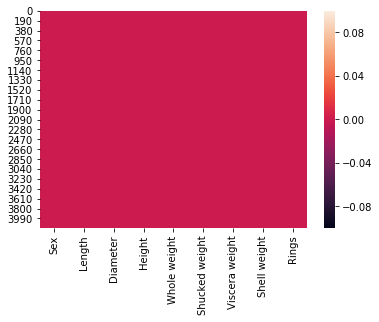

In [99]:
sns.heatmap(df.isnull())

There are no null values in the dataset

In [100]:
a=df.iloc[:,0]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=le.fit_transform(a)
a

array([2, 2, 0, ..., 2, 0, 2])

In [101]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Starting with EDA

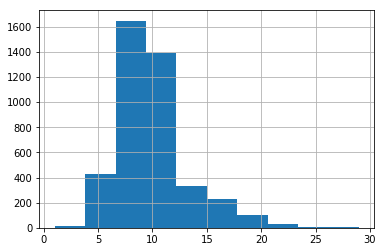

In [102]:
#Univariate Analysis
df['Rings'].hist(grid=True)
plt.show()

Maximum number of data contains rings between 6 to 12

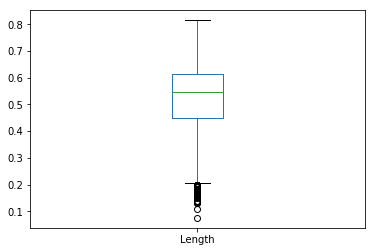

In [103]:
df['Length'].plot.box()

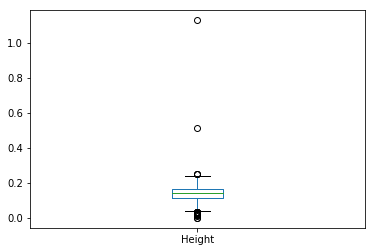

In [104]:
df['Height'].plot.box()

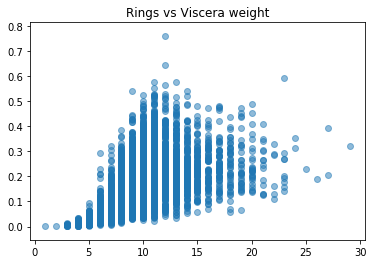

In [105]:
plt.scatter(df["Rings"],df["Viscera weight"],alpha=0.5)
plt.title("Rings vs Viscera weight")
plt.show()

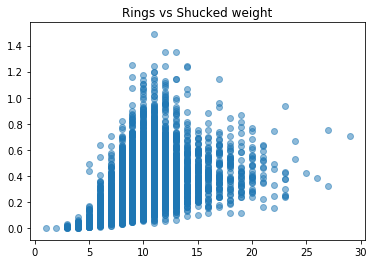

In [106]:
plt.scatter(df["Rings"],df["Shucked weight"],alpha=0.5)
plt.title("Rings vs Shucked weight")
plt.show()

In [107]:
collist=df.columns.values
ncol=12
nrows=10

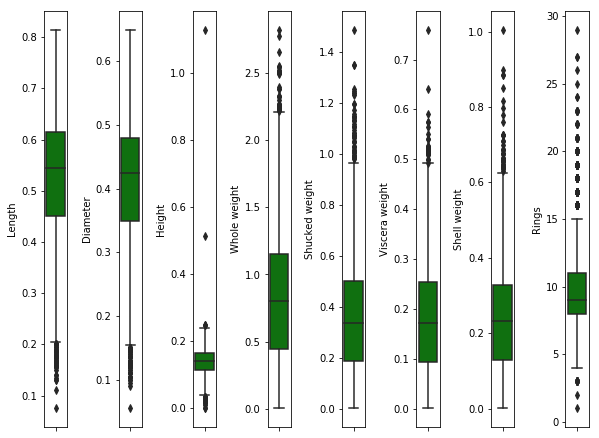

In [108]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

We can see few outliers in the data

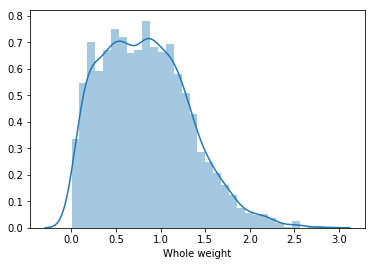

In [109]:
sns.distplot(df['Whole weight'])

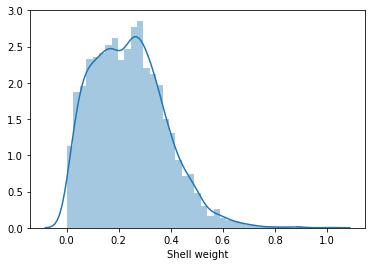

In [110]:
sns.distplot(df['Shell weight'])

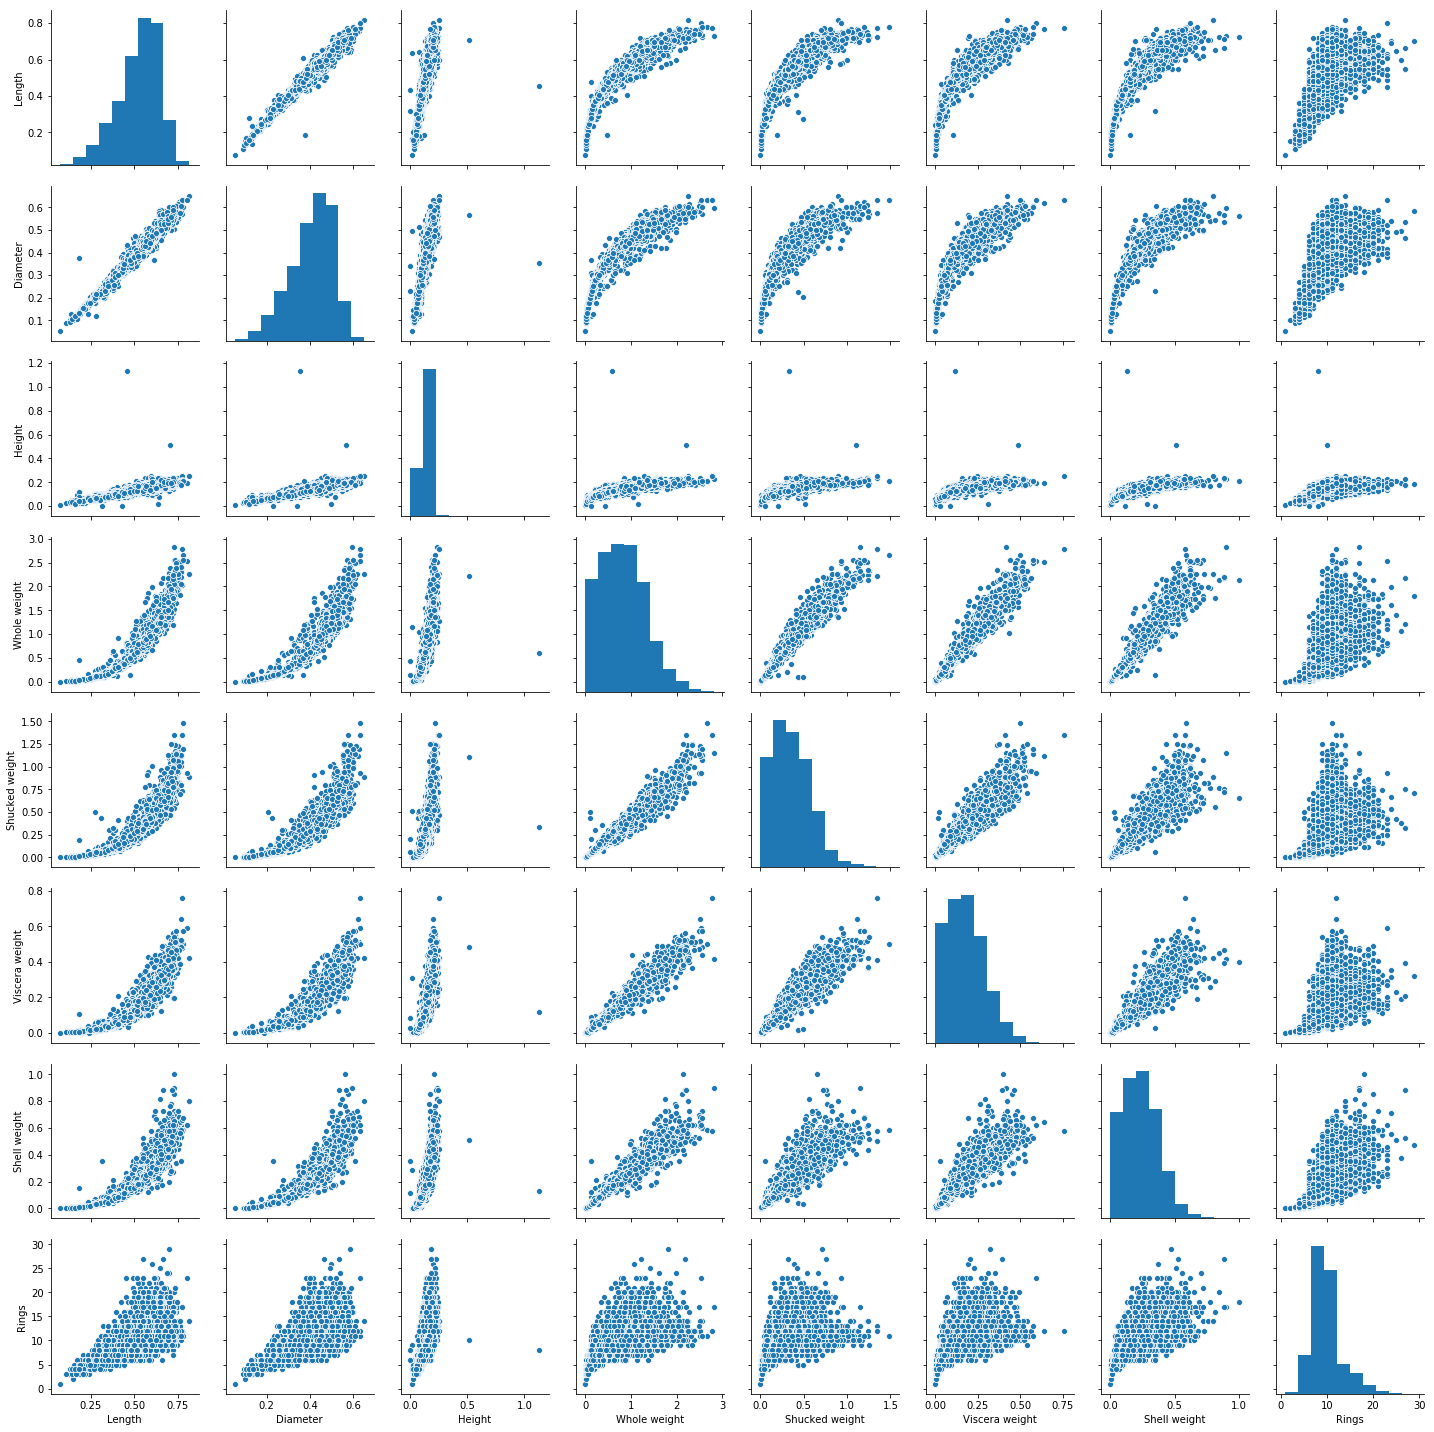

In [111]:
sns.pairplot(df)

We can observe that most data is positively correlated

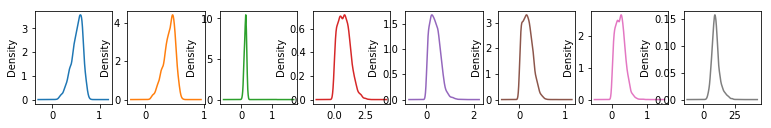

In [112]:
#Another example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(6,11),legend=False,sharex=False,figsize=(18,12))
plt.show()

Not too much skewness is observed in the data

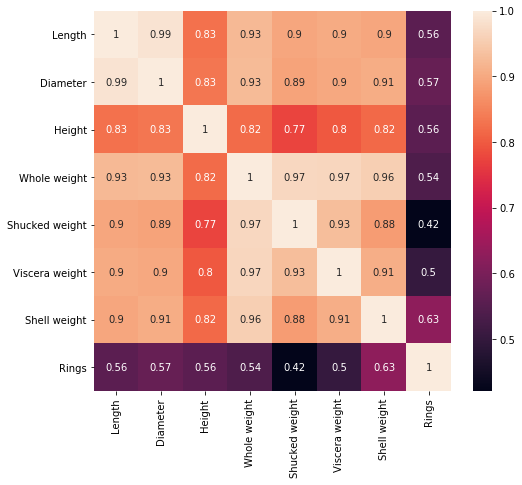

In [113]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [114]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

We can observe that almost all attributes are correlating with the number of rings

In [115]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=columns.df)

ValueError: could not convert string to float: 'M'